In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Softmax Regression

- Softmax regression is a generalized method of **logistic regression**
- It is used for **multiclass classification**
- Softmax regression is trained using **categorical cross-entropy loss**
- The labels are presented using **one-hot encoding**

## Traing data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

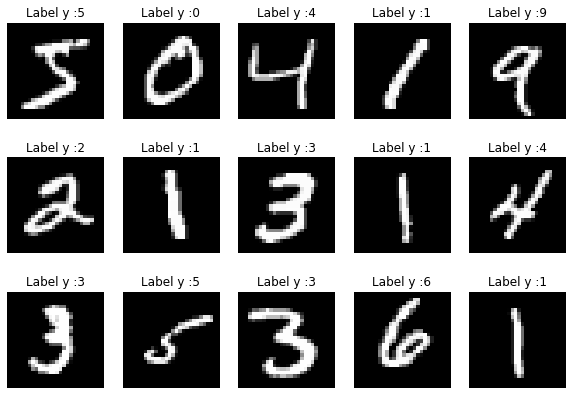

In [3]:
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    ax.imshow(X_train[i],cmap = 'gray')
    ax.set_title(f'Label y :{y_train[i]}')
    plt.axis('off')
              

- Each image is a gray image of size 28x28

In [4]:
X_train = X_train.reshape(-1,784)/255
X_test = X_test.reshape(-1,784)/255

### One-hot encoding

In [5]:
def one_hot_encode(labels):
    e = np.eye(len(np.unique(labels)))
    y_enc = e[labels]
    
    return y_enc

In [14]:
##One hot encding function given in lectures
def convert_to_onehot(y,k):
    y_one_hot = np.zeros(len(y),k)
    y_one_hot[np.arange(len(y)),y] = 1
    
    return y_one_hot

## Softmax Regression Implementation

**STEP-1** In vectorized form we implement **Z = XW + b**

In [6]:
def linear_combination(X,w,b):
    return X@w + b

In [7]:
y_enc = one_hot_encode(y_train)
n,m = X_train.shape
_,c = y_enc.shape
w = np.random.random((m,c))
b = np.random.random(c)

In [8]:
n,m,c,w.shape,b.shape,X_train.shape

(60000, 784, 10, (784, 10), (10,), (60000, 784))

In [9]:
LT = linear_combination(X_train,w,b)

**STEP-2** Calculate softmax for each class

In [10]:
def softmax(z):
    exp = np.exp(z - np.max(z))
    ## Applying softmax
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

In [11]:
SF = softmax(LT)

In [12]:
SF

array([[8.41166548e-01, 2.84736641e-03, 3.48345333e-04, ...,
        3.56881931e-02, 2.04973827e-02, 9.57136603e-03],
       [1.52406424e-01, 1.37562462e-03, 2.81157607e-03, ...,
        3.39500894e-04, 7.81249680e-01, 2.40514728e-02],
       [3.26308805e-01, 1.65999682e-01, 8.13456256e-03, ...,
        2.94966342e-03, 8.12949375e-03, 1.38689755e-01],
       ...,
       [1.64896448e-02, 1.11006484e-01, 3.52622664e-05, ...,
        1.75005232e-03, 7.87272912e-03, 3.95546555e-04],
       [1.39248495e-01, 1.05528421e-02, 7.24754125e-03, ...,
        8.55230361e-03, 4.18019055e-01, 5.49881712e-04],
       [2.77634495e-01, 1.93830622e-03, 9.65426453e-03, ...,
        1.17857720e-02, 1.39278831e-02, 2.93114816e-03]])

## Loss Function

For softmax regression we use **cross-entropy**(CE) loss 

for any pair of label vector  $\textbf {$y_{k}$}$ and predction $\textbf {$y_{k}^{i}$}$ over k classes the loss function J is given by:

$$ J(w) = -\sum_{k}y_{k} log (y_{k}^{i})  $$

## Optimization

- The objective here is to estimate the weight vector $\textbf{$W_{m \times k}$}$ and $\textbf{$b_{k \times 1}$}$ by optimizing the loss $\textbf{$J(W,b)$}$

## Partial Derivative in  vectorized form

$$
\frac{\partial J(W,b)}{\partial W} = X^{T}(Y^{pred} - Y)
$$

$$
\frac{\partial J(W,b)}{\partial b} = Y^{pred} - Y
$$

In [84]:
def fit(X,y,lr,c,epoch):
    n,m = X.shape
    w = np.random.random((m,c))
    b = np.random.random(c)
    losses = []
    
    for epoch in range(epoch):
        z = X@w +b
        y_hat = softmax(z)
        
        y_hot = one_hot_encode(y)
        
        w_grad = (1/n)*np.transpose(X)@(y_hat - y_hot)
        b_grad = (1/n)*np.sum(y_hat - y_hot)
        
        w -= lr*w_grad
        b -= lr*b_grad
        
        loss = -np.mean(np.log(y_hat[np.arange(len(y)),y]))

        losses.append(loss)
        
        
    return w,b,losses

In [85]:
def predict(X,w,b):
    z = X@w +b
    y_hat = softmax(z)
    
    return np.argmax(y_hat,axis=1)

In [86]:
def accuracy(y,y_hat):
    return np.sum(y==y_hat)/len(y)

In [90]:
w,b,l = fit(X=X_train,y=y_train,lr=0.9,c = 10,epoch=100)

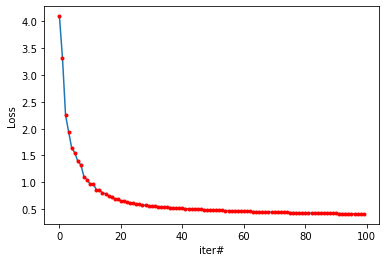

In [95]:
plt.plot(l)
plt.plot(l,'.r')
plt.xlabel("iter#")
plt.ylabel("Loss")
plt.show()

In [98]:
y_pred = predict(X_test,w,b)
print(F"Accuracy on the test set: {accuracy(y_test,y_pred)}")

Accuracy on the test set: 0.885


## Confusion matrix

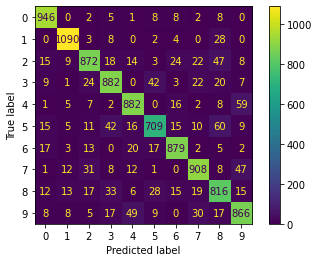

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

## Classification report

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.95      0.96      0.96      1135
           2       0.89      0.84      0.86      1032
           3       0.87      0.87      0.87      1010
           4       0.88      0.90      0.89       982
           5       0.87      0.79      0.83       892
           6       0.91      0.92      0.91       958
           7       0.89      0.88      0.89      1028
           8       0.80      0.84      0.82       974
           9       0.85      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.89      0.88     10000



In [105]:
(X_train@w).shape

(60000, 10)

# K-Nearest Neighbours

In [107]:
from IPython.display import Math,display,Latex

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
from sklearn.datasets import make_blobs,make_classification
from sklearn.model_selection import train_test_split

## Distance Computation

In [134]:
def EuclidianDistance(x1,x2):
    '''
    x1 -> Row Vector
    x2 -> Row Vector
    '''
    dist = np.sum((x1 - x2)**2,axis = 1)
    return dist

def ManhattanDistance(x1,x2):
    '''
    x1 -> Row Vector
    x2 -> Row Vector
    '''
    return np.sum(abs((x1 - x2)),axis = 1)

# K-NN Implementation

In [153]:
class KNearestNeighbour():
    def __init__(self,k,distance_metric=EuclidianDistance,task_type='Classification'):
        self.k = k
        self.distance_metric = distance_metric
        self.task_type =task_type
        
    def fit(self,X,y):
        self._X = X
        self._y = y
        
        
    def predict(self,newExample):
        distance_vector = self.distance_metric(self._X,newExample)
        
        k_nearest_neighbour_indices = np.argpartition(distance_vector,self.k)[:self.k]
        
        k_nearest_neighbours = self._y[k_nearest_neighbour_indices]
        
        
        if self.task_type == "Classification":
            label = stats.mode(k_nearest_neighbours)[0]
            
        else:
            label = k_nearest_neighbours.mean()
            
            
        return label,k_nearest_neighbour_indices
    
    def eval(self,X_test,y_test):
        if self.task_type == "Classification":
            y_pred = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_pred[i],_ = self.fit(X_test[i,:])
            error = np.mean(y_test == y_pred,axis = 0)
            
        else:
            y_pred = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_pred[i],_ =self.fit(X_test[i,:])
            error_vector = y_pred - y_test
            
            error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
                
        return error

In [156]:
X,y  =make_blobs(n_samples=100,n_features=2,centers = [[0,0],[5,5]],cluster_std=1,random_state=0)

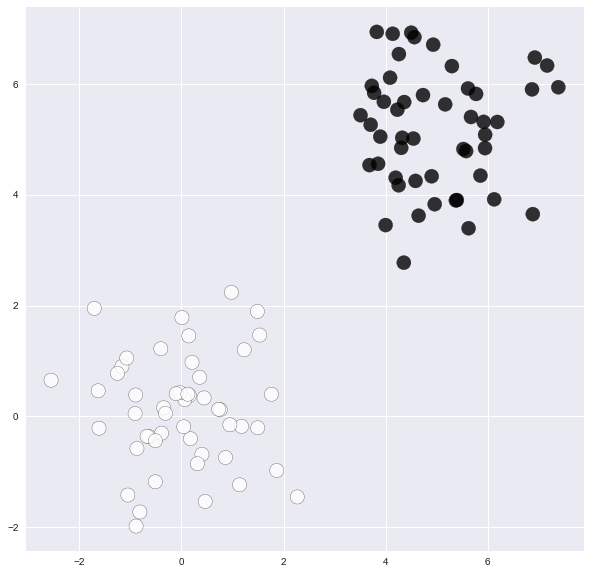

In [160]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c = y,s = 200,edgecolors='k',alpha=0.8)

In [161]:
newExample = np.array([2.2,2.2])
model = KNearestNeighbour(3,distance_metric=EuclidianDistance)
model.fit(X,y)

In [162]:
prediction,nearest_neighbour_indices = model.predict(newExample.reshape(1,2))

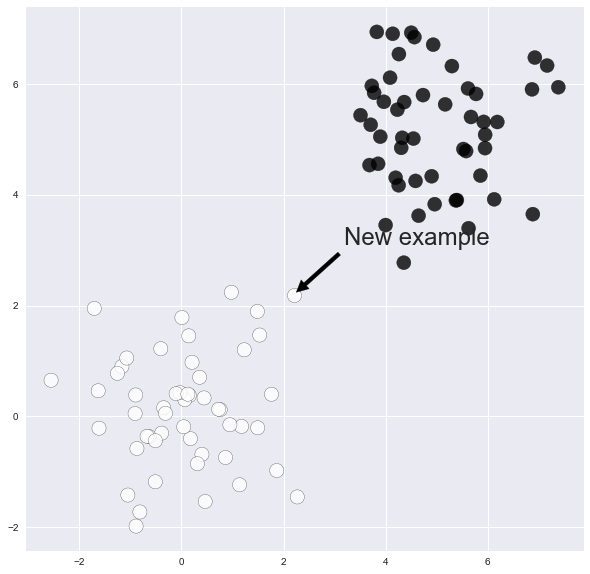

In [166]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c = y,s = 200,edgecolors='k',alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',c = 'white',s = 200,edgecolors='k',alpha=0.8)
plt.annotate("New example",xy=newExample,xytext = (50,50),textcoords = 'offset points',
            arrowprops = dict(facecolor ='black',shrink = 0.05),fontsize = 24)
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c = y,s = 200,edgecolors='k',alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',c = 'white',s = 200,edgecolors='k',alpha=0.8)
plt.annotate("New example",xy=newExample,xytext = (50,50),textcoords = 'offset points',
            arrowprops = dict(facecolor ='black',shrink = 0.05),fontsize = 24)

for xi in X[nearest_neighbour_indices]:
    plt.plot()
plt.show()
